# We're going to go try out some spectral analysis techniques on simulated 'spectra'.












# **Introduction to Spectra.**


We use spectra to figure out which **minerals** are present onother planets.

Once we have an idea of **what** is present we can start to build a picture of the environment, climate, history and geology of the site.






#**Trial Spectra**
Creating some nice, clean, simple simulated spectra for now.



In [ ]:
#Lets import our libraries
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import statistics as stats


x = np.arange(0, 1000, 1)
#Our x data will start at 1nm and go up to 1000nm in steps of 1nm.
#This would be the same as writing out all the values between 1 and 1000 in square brackets [1,2,3..., 1000]

y = ((np.sin(x/98)*np.cos(x/145))*80)+20
#Dont worry about this function it is just supposed to look similar to spectra

print ('Data Creation Complete')

Data Creation Complete


#**Finding spectral signatures**



Spectral signatures aren't inherently useful on their own. We need a database of the samples we're interested in to compare to.

Let's plot the data and identify the points of interest.
The majority of people measure points of interest manually.

1) Use the vertical line plotting function to plot coloured lines over the maximum turning points and the minimum turning points. From now on we'll refer to them as points of interest.


2) Find the maximum and minimum value of the data and plot two horizontal lines to show where they are.

Pick different coloured lines to your vertical markers.


In [ ]:
#Your Code here


So, the points of interest are?

#**Extension Exercise**
**Systematic Searching**

3) Write a programme to systematically search for maximum and minimum 'points of interest' and return their values.

In [ ]:
#Your code here

#**Spectral Algebra**

**Now we have points of interest we can do some basic spectral algebra**



1.   Find the **slope** between your first two points of interest: $(X_{1}, Y_{1}), (X_{2}, Y_{2})$.



\begin{align}
Slope = \frac{y_{2}-y_{1}}{x_{2}- x_{1}}
\end{align}


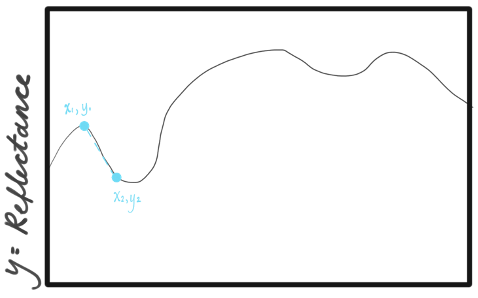

---


2.   Find the **ratio** of reflectance between your first two points of interest $(X_{1}, Y_{1}), (X_{2}, Y_{2})$.

\begin{align}
Ratio = \frac{y_{2}}{y_{1}}
\end{align}

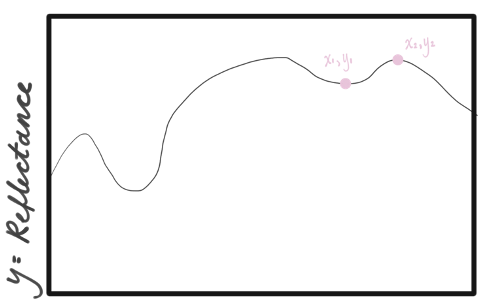

---

3.   Finding the shoulder height or band depth between two points.

Select the point to measure band depth: $(X_{c}, Y_{c})$

Identify the closest two points  of interest either side: $(X_{1}, Y_{1}), (X_{2}, Y_{2})$.

Find the gradient of the line between these two points. This line is known as the continuum in this case.

Identify the theoretical point $(X_{c}, Y_{c}')$ that lies on the continuum line.
\begin{align}
\text{Band depth/Shoulder Height} = Y_{c}-Y_{c}'
\end{align}

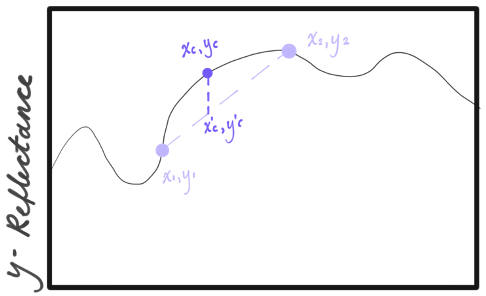

#**1) Slope from Maxima 1 to Minima 1**

In [ ]:
#Your code goes here

#**1)Ratio from Maxima 1 to Minima 1**

In [ ]:
#Your code goes here

#**1) Band depth at Minima 1, from Maxima 1 to Minima 2**

In [ ]:
#Your code goes here

In [ ]:
#Your code goes here

In [ ]:
#Your code goes here

#**Your turn**
Simulate some new (preferably more complex) spectra and do some more algebra.


In [ ]:
#Your code goes here

